# Complete graph Laplacian

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In discrete mathematics a [Graph](http://en.wikipedia.org/wiki/Graph_%28mathematics%29) is a set of *vertices* or *nodes* that are connected to each other by *edges* or *lines*. If those *edges* don't have directionality, the graph is said to be *undirected*. Graphs are used to model social and communications networks (Twitter, Facebook, Internet) as well as natural systems such as molecules.

A [Complete Graph](http://en.wikipedia.org/wiki/Complete_graph), $K_n$ on $n$ nodes has an edge that connects each node to every other node.

Here is $K_5$:

/opt/conda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: Future behavior will be consistent with the long-time
    default: plot commands add elements without first
    clearing the Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: Future behavior will be consistent with the long-time
    default: plot commands add elements without first
    clearing the Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:914: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


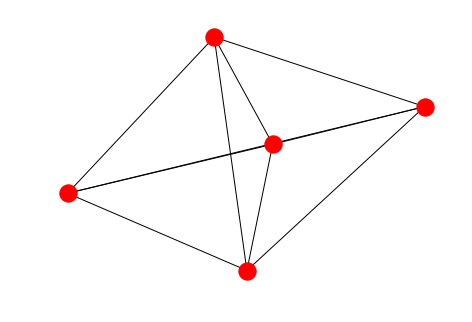

In [2]:
import networkx as nx
K_5=nx.complete_graph(5)
nx.draw(K_5)

The [Laplacian Matrix](http://en.wikipedia.org/wiki/Laplacian_matrix) is a matrix that is extremely important in graph theory and numerical analysis. It is defined as $L=D-A$. Where $D$ is the [degree matrix](https://en.wikipedia.org/wiki/Degree_matrix) and $A$ is the [adjecency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix). For the purpose of this problem you don't need to understand the details of these matrices, although their definitions are relatively simple (I encourage you to follow the links above and read about them).

The degree matrix for $K_n$ is an $n \times n$ diagonal matrix with the value $n-1$ along the diagonal and zeros everywhere else. Write a function to compute the degree matrix for $K_n$ using NumPy.

In [3]:
import vizarray as va

In [4]:
def descending_deg(n):
    """Return the integer valued degree matrix D for the complete graph K_n."""
    L = [x for x in range(n, 0, -1)]
    D = np.diag(L)
    return D

In [5]:
def complete_deg(n):
    return np.diag(np.repeat(n-1, n))

In [6]:
D = complete_deg(5)
va.vizarray(D)

,,,,
,,,,
,,,,
,,,,
,,,,


In [7]:
D[0:]

array([[4, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 4]])

In [8]:
D = complete_deg(5)
assert D.shape==(5,5)
assert D.dtype==np.dtype(int)
assert np.all(D.diagonal()==4*np.ones(5))
assert np.all(D-np.diag(D.diagonal())==np.zeros((5,5),dtype=int))

The adjacency matrix for $K_n$ is an $n \times n$ matrix with zeros along the diagonal and ones everywhere else. Write a function to compute the adjacency matrix for $K_n$ using NumPy.

In [9]:
def complete_adj(n):
    """Return the integer valued adjacency matrix A for the complete graph K_n."""
    D = np.diag(np.repeat(True, n))
    A = np.bitwise_xor(np.ones((n,n), dtype=bool), D)
    A = np.asarray(A, dtype=np.int)
    return A

In [10]:
A = complete_adj(5)
assert A.shape==(5,5)
assert A.dtype==np.dtype(int)
assert np.all(A+np.eye(5,dtype=int)==np.ones((5,5),dtype=int))

Use NumPy to explore the eigenvalues or *spectrum* of the Laplacian *L* of $K_n$. What patterns do you notice as $n$ changes? Create a *conjecture* about the general Laplace *spectrum* of $K_n$.

In [11]:
import numpy.linalg as la

In [12]:
def display_lap(n):
    D = complete_deg(n)
    A = complete_adj(n)
    L = D - A
    return la.eigvals(L)

In [13]:
display_lap(9)

array([  9.00000000e+00,  -1.11022302e-15,   9.00000000e+00,
         9.00000000e+00,   9.00000000e+00,   9.00000000e+00,
         9.00000000e+00,   9.00000000e+00,   9.00000000e+00])

In [14]:
display_lap(1)

array([ 0.])

In [15]:
display_lap(2)

array([ 2.,  0.])

In [16]:
display_lap(33)

array([  3.30000000e+01 +0.00000000e+00j,
        -3.10862447e-15 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.00000000e+00j,
         3.30000000e+01 +0.0000000

In a few sentences, propose a *conjecture* about the general Laplace *spectrum* of $K_n$:

There seem to be n-1 frequency within the matrix for n with one value near zero for all matrices.